In [9]:
import pandas as pd
df=pd.read_csv('twitter_sentiment.csv',header=None, index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
df = df[[2,3]].reset_index(drop=True)


In [11]:
df.columns=['sentiment','text']

In [12]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [16]:
df.isnull().sum()
df.dropna(inplace=True)


In [18]:
df['text'].apply(len).value_counts()

,count
text,
70,611
3,566
2,500
36,485
57,480
53,471
26,468
47,464
34,463


In [20]:
df=df[df['text'].apply(len)>5]

In [22]:
df.shape

(72883, 2)

In [23]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22020
Positive,20186
Neutral,17899
Irrelevant,12778


**Feature creation**

In [25]:
df['char_count']=df['text'].apply(len)
df.head()

<ipython-input-25-435180011e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count']=df['text'].apply(len)


,sentiment,text,char_count
0,Positive,im getting on borderlands and i will murder yo...,53
1,Positive,I am coming to the borders and I will kill you...,51
2,Positive,im getting on borderlands and i will kill you ...,50
3,Positive,im coming on borderlands and i will murder you...,51
4,Positive,im getting on borderlands 2 and i will murder ...,57


In [26]:
df[df['char_count']<10]

,sentiment,text,char_count
60,Neutral,. . [,8
65,Neutral,.. what,7
89,Positive,FUCK YOU.,9
555,Neutral,Trying it,9
557,Neutral,you out,7
...,...,...,...
75080,Positive,A Classic,9
75330,Positive,Cant wait,9
75379,Neutral,Aiiight 💪,9
75394,Negative,Holy shit,9


In [30]:
df['word_count'] = [len(text.split()) for text in df['text']]
df.head()
df[df['word_count']<7]

<ipython-input-30-9211c8551a40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = [len(text.split()) for text in df['text']]


,sentiment,text,char_count,word_count
42,Neutral,Check out this epic streamer!.,32,5
43,Neutral,Check out this epic streamer!.,30,5
44,Neutral,Watch this epic striptease!.,28,4
45,Neutral,Check out our epic streamer!.,29,5
46,Neutral,Check out this big epic streamer!.,34,6
...,...,...,...,...
75638,Positive,FUCKING FINALLLLYYYYYYYYY,25,2
75651,Neutral,Red Dead Redemption pic.twitter.com/qNN6Cnz5YQ,46,4
75654,Positive,FUCKING FINALLY,15,2
75663,Positive,@WarcraftDevs this would be incredible!,39,5


AVG WORD LENGTH

In [31]:
def average_word_length(text):
    words = text.split()
    total_length = sum(len(word) for word in words)
    return total_length / len(words) if words else 0



df['avg_word_length'] = df['text'].apply(average_word_length)
df.head()

<ipython-input-31-ec94098faa8a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_word_length'] = df['text'].apply(average_word_length)


,sentiment,text,char_count,word_count,avg_word_length
0,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091
1,Positive,I am coming to the borders and I will kill you...,51,12,3.333333
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000
3,Positive,im coming on borderlands and i will murder you...,51,10,4.200000
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333


In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

STOP WORD COUNT

In [34]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def count_stopwords(text):
    words = text.split() # words in text
    l=0
    for word in words:
        if word in stop_words:
            l=l+1
    return l


df['stopword_count'] = df['text'].apply(count_stopwords)
df.head()

,sentiment,text,char_count,word_count,avg_word_length,stopword_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091,6
1,Positive,I am coming to the borders and I will kill you...,51,12,3.333333,6
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000,5
3,Positive,im coming on borderlands and i will murder you...,51,10,4.200000,5
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333,6


HASHTAG COUNT

In [37]:

def count_hashtag(text):
    words = text.split() # words in text
    l=0
    for char in words:
        if char=='#':
            l=l+1
    return l

df['hashtag_count'] = df['text'].apply(count_hashtag)
df[df['hashtag_count']>1]

,sentiment,text,char_count,word_count,avg_word_length,stopword_count,hashtag_count
5091,Neutral,RT @richardturrin: Amazon and Goldman<unk>. Pe...,196,21,8.333333,1,2
15153,Neutral,. @Crystallize99 became # # of EU MMR leaderb...,93,13,6.153846,1,2
43712,Negative,# # # # # # # # # # # # # # # # # # # # # # # ...,395,198,1.000000,0,198


MENTIONS COUNT

In [42]:
def count_mentions(text):
    words = text.split() # words in text
    l=0
    for char in words:
        if char=='@':
            l=l+1
    return l



df['@mentions_count']= df['text'].apply(count_mentions)
df[ (df['@mentions_count']>1) & (df['char_count']<50)]

,sentiment,text,char_count,word_count,avg_word_length,stopword_count,hashtag_count,@mentions_count
2696,Neutral,Credit: @ HNSOfficial _ @ ModernWarzone,39,6,5.666667,0,0,2
4160,Irrelevant,@ ThumblessCudi @ Kinz @ skrapzg @ Paramete,43,8,4.500000,0,0,4
5996,Negative,@ narendramodi @ PMOIndia Please help...,40,6,5.833333,0,0,2
11785,Negative,Bruh @ Ronnie2K @ NBA2K Who the hell is that?,45,10,3.600000,2,0,2
11786,Negative,Bruh @ Ron2K @ N2K who is?,26,7,2.857143,1,0,2
...,...,...,...,...,...,...,...,...
72482,Irrelevant,. @ Five9: + 79%. @ NICELtd @ inContact: + 39%,46,11,3.272727,0,0,3
73015,Negative,@ nvidia @ NVIDIAGeForce,24,4,5.250000,0,0,2
73016,Negative,@ nvidia @ NVIDIAGeForce,24,4,5.250000,0,0,2
74509,Positive,@ NVIDIAGeForce @ nvidia,24,4,5.250000,0,0,2


In [46]:
def count_digits(text):
    l= 0
    for char in text:
        if char.isdigit():
            l+= 1
    return l



df['digit_count'] = df['text'].apply(count_digits)
df.head()

,sentiment,text,char_count,word_count,avg_word_length,stopword_count,hashtag_count,@mentions_count,digit_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091,6,0,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,3.333333,6,0,0,0
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000,5,0,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,4.200000,5,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333,6,0,0,1


In [47]:
def count_UpperCase(text):
    l= 0
    for char in text:
        if char.isupper():
            l+= 1
    return l


df['upper_case_count'] = df['text'].apply(count_UpperCase)
df.head()

,sentiment,text,char_count,word_count,avg_word_length,stopword_count,hashtag_count,@mentions_count,digit_count,upper_case_count
0,Positive,im getting on borderlands and i will murder yo...,53,11,3.909091,6,0,0,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,3.333333,6,0,0,0,2
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.100000,5,0,0,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,4.200000,5,0,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,3.833333,6,0,0,1,0


DATA VISUALIZATION

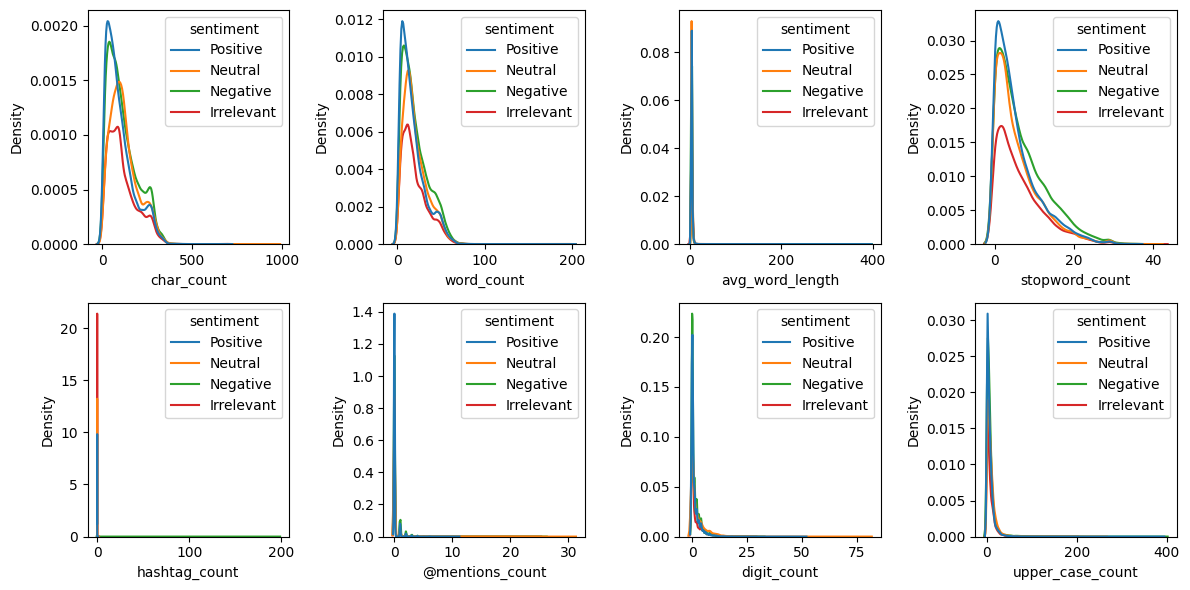

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
num_cols=df.select_dtypes(include='number').columns
num_cols

for index,col in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=col,hue='sentiment',fill=False)
plt.tight_layout()
plt.show()

<Axes: ylabel='sentiment'>

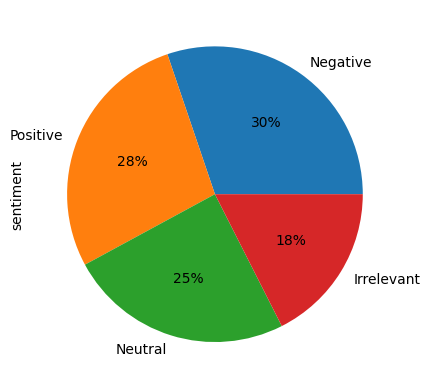

In [63]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%",ylabel='sentiment')


WORD CLOUD

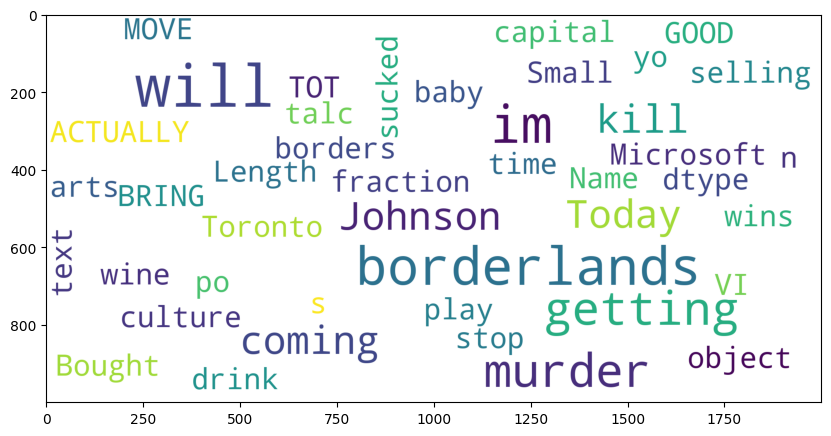

In [67]:
from wordcloud import WordCloud,STOPWORDS

stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='white',max_words=400,max_font_size=30,scale=5).generate(str(df['text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()

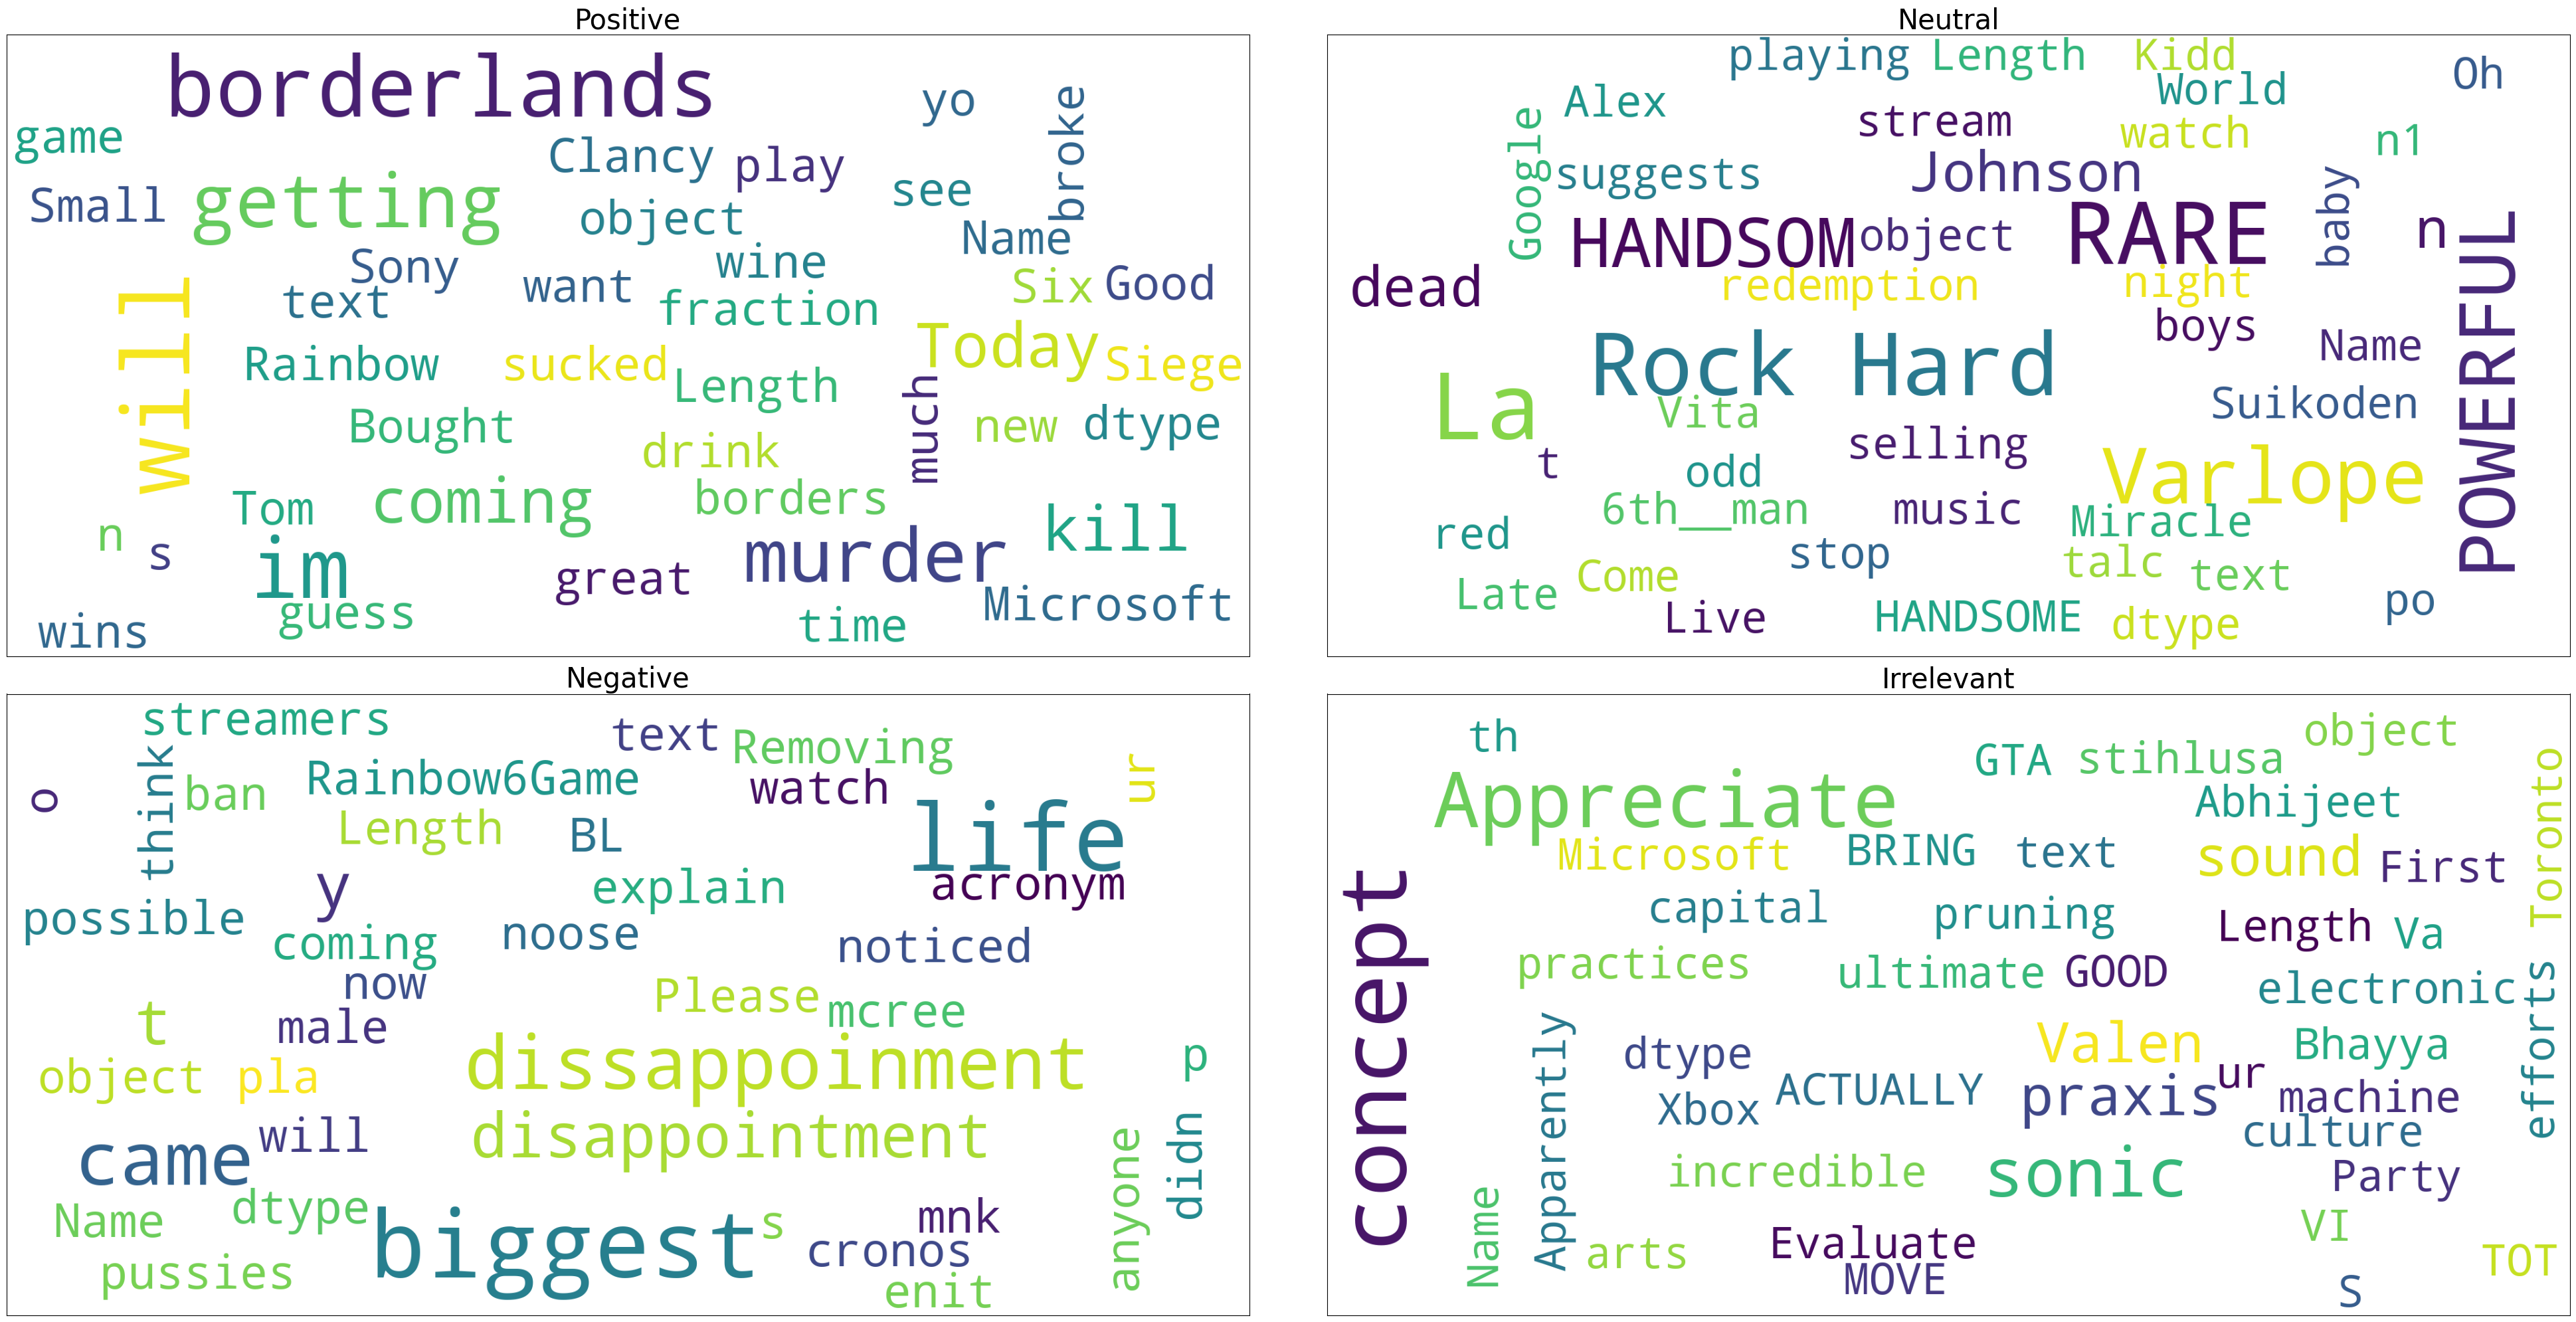

In [71]:
plt.figure(figsize=(40,20))
for index,sentiment  in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data=df[df['sentiment']==sentiment]['text']
    wordcloud=WordCloud(background_color='white',max_words=300,max_font_size=30,scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sentiment,fontsize=30)
plt.tight_layout()
plt.show()